In [ ]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import  recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [ ]:
def read_idx(filename):
    with open(filename, 'rb') as f:
    #this opens the file for reading in binary format
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        #The >HBB format specifier tells struct to expect 3 values in little endian format
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)
    #this is a function used to convert the data in these binary files into numpy array

In [ ]:
raw_train = read_idx("/home/koushik/Downloads/train-images-idx3-ubyte")
train_data = np.reshape(raw_train, (60000,28*28))
#it turns a 2D image into 1 long 28x28 vector as we need to feed the information as high dimensional vector
train_label = read_idx("/home/koushik/Downloads/train-labels-idx1-ubyte")

raw_test = read_idx("/home/koushik/Downloads/t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test, (10000,28*28))
test_labels = read_idx("/home/koushik/Downloads/t10k-labels-idx1-ubyte")
#this block of code is to flatten a 28x28 image

/home/koushik/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


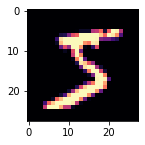

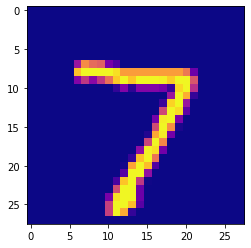

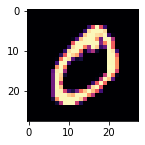

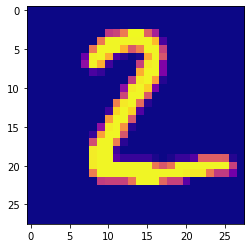

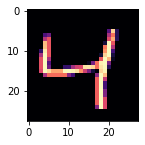

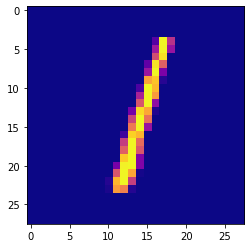

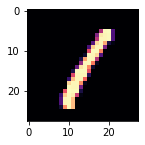

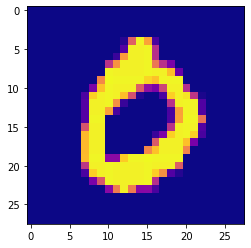

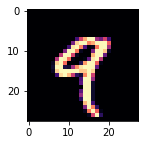

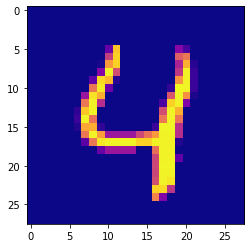

In [ ]:
def result(x,y,z):
    global k
    k = x.fit(y,z)
for i in range(5):
    plt.figure(figsize = (2,10))
    img = train_data[i].reshape((28,28))
    img1 = test_data[i].reshape((28,28))
    plt.imshow(img, cmap="magma")
    plt.show()
    plt.imshow(img1, cmap="plasma")
    plt.show()

In [ ]:
train_data.shape

(60000, 784)

# **Using SVM**


In [ ]:
#training data
idx = (train_label == 2) | (train_label == 3) | (train_label == 8)
X = train_data[idx]/255.0
Y = train_label[idx]
result(svm.SVC(C=5, gamma=0.05), X, Y)
#testing data
idx = (test_labels == 2) | (test_labels == 3) | (test_labels == 8)
x_test = test_data[idx]/255.0
y_test = test_labels[idx]
y_pred = k.predict(x_test)

In [ ]:
pd.crosstab(y_test, y_pred, rownames = ["actual label"], colnames = ["predicted label"], normalize = False)

predicted label,2,3,8
actual label,,,
2,1024,1,7
3,3,1001,6
8,1,3,970


In [ ]:
precision = precision_score(y_test, y_pred, average ='micro')
recall = recall_score(y_test, y_pred, average ='micro')
accuracy = accuracy_score(y_test, y_pred)
print(precision,recall,accuracy)
#precision is used to find out of the tp predicted by the model what is the % of the actual +ve result
#lower the false +ve higher the precision
#lower the false -ve higher the recall

0.9930371352785146 0.9930371352785146 0.9930371352785146


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)
#it is the harmonic mean of pecision and recall

0.9930371352785146


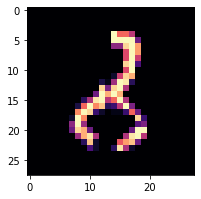

In [ ]:
idx  = np.where((y_pred == 2) & (y_test == 8))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = x_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="magma")
    plt.show()

In [ ]:
idx  = np.where((y_pred == 8) & (y_test == 8))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = x_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

# **Using KNN**


In [ ]:
#training data
from sklearn import neighbors
idx = (train_label == 2) | (train_label == 3) | (train_label == 8)
Q = train_data[idx]/255.0
W = train_label[idx]
result(neighbors.KNeighborsClassifier(n_neighbors = 5), Q, W)
#testing data
idx = (test_labels == 2) | (test_labels == 3) | (test_labels == 8)
Q_test = test_data[idx]/255.0
W_test = test_labels[idx]
W_pred = k.predict(Q_test)

In [ ]:
#confusion matrix
pd.crosstab(W_test, W_pred, rownames = ["actual label"], colnames = ["predicted label"], normalize = False)

predicted label,2,3,8
actual label,,,
2,1023,3,6
3,3,1001,6
8,5,17,952


In [ ]:
precision = precision_score(W_test, W_pred, average ='micro')
recall = recall_score(W_test, W_pred, average ='micro')
accuracy = (1023+1001+952)/3016
print(precision,recall,accuracy)

0.986737400530504 0.986737400530504 0.986737400530504


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.986737400530504


In [ ]:
#display images that were predicted to be 2 but the ground truth was 8.
idx  = np.where((W_pred == 2) & (W_test == 8))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = Q_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [ ]:
#display images that were predicted to be 2 and ground truth is also 2.
idx  = np.where((W_pred == 2) & (W_test == 2))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = Q_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

# **Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#training data
idx = (train_label == 2) | (train_label == 3) | (train_label == 8)
A = train_data[idx]
B = train_label[idx] 
result(LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='auto'), A, B)
#testing data
idx = (test_labels == 2) | (test_labels == 3) | (test_labels == 8)
A_test = test_data[idx]
B_test = test_labels[idx]
B_pred = k.predict(A_test)

/home/koushik/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
#confusion matrix
pd.crosstab(B_test, B_pred, rownames = ["actual label"], colnames = ["predicted label"], normalize = False)

predicted label,2,3,8
actual label,,,
2,968,25,39
3,21,952,37
8,11,29,934


In [ ]:
precision = precision_score(B_test, B_pred, average ='micro')
recall = recall_score(B_test, B_pred, average ='micro')
accuracy = (968+952+934)/3016
print(precision,recall,accuracy)

0.9462864721485411 0.9462864721485411 0.9462864721485411


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.9462864721485411


In [ ]:
#display images that were predicted to be 2 but the ground truth was 8.
idx  = np.where((B_pred == 2) & (B_test == 8))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = A_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="copper")
    plt.show()

In [ ]:
#display images that were predicted to be 3 and the ground truth was also 3.
idx  = np.where((B_pred == 3) & (B_test == 3))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = A_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="afmhot")
    plt.show()

# **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#training data
idx = (train_label == 2) | (train_label == 3) | (train_label == 8)
P = train_data[idx]
O = train_label[idx] 
result(RandomForestClassifier(), P, O)
#testing data
idx = (test_labels == 2) | (test_labels == 3) | (test_labels == 8)
P_test = test_data[idx]
O_test = test_labels[idx]
O_pred = k.predict(P_test)

/home/koushik/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#confusion matrix
pd.crosstab(O_test, O_pred, rownames = ["actual label"], colnames = ["predicted label"], normalize = False)

predicted label,2,3,8
actual label,,,
2,1005,9,18
3,23,974,13
8,13,12,949


In [ ]:
precision = precision_score(O_test, O_pred, average ='macro')
recall = recall_score(O_test, O_pred, average ='micro')
accuracy = (1008+971+942)/3016
print(precision,recall,accuracy)

0.9708932289119142 0.9708222811671088 0.968501326259947


In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.9708577537433426


In [ ]:
#display images that were predicted to be 3 and the ground truth was also 3.
idx  = np.where((O_pred == 3) & (O_test == 3))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = P_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="spring")
    plt.show()

In [ ]:
#display images that were predicted to be 2 but the ground truth was 3.
idx  = np.where((O_pred == 2) & (O_test == 3))[0]
fig = plt.figure(figsize = (3,10))
for i in range(len(idx)):
    img = P_test[idx[i]].reshape((28,28))
    plt.imshow(img, cmap="winter")
    plt.show()

In [1]:
thistuple = (0.9930371352785146, 0.986737400530504, 0.9462864721485411, 0.968501326259947)
tuple1 = ("SVM","KNN","Logistic regression","random forest")
    
for i in range(0,4):
     print("the accuracy of", tuple1[i],"=",thistuple[i])

the accuracy of SVM = 0.9930371352785146
the accuracy of KNN = 0.986737400530504
the accuracy of Logistic regression = 0.9462864721485411
the accuracy of random forest = 0.968501326259947


<b>Thus SVM and KNN seems to outperform other algorithms on MNIST.</b>